### LA CRISE ECONOMIQUE EN BELGIQUE ENTRE 1929 ET 1933

###Il est question de réaliser une étude comparative de deux journaux belges: Le Drapeau Rouge et La Libre Belgique; 
afin de voir les secteurs mis en avant pendant cette période

### I- Création de nos corpus d'analyse


###A partir des fichiers extraits de la base de données CAMILLE, nous allons créer nos deux grands corpus d'analyse

In [99]:
## IMPORTS
import os
import textract

#Le dossier Data1 est constitué des fichiers relatifs aux articles publiés dans le journal Le Drapeau Rouge pendant ladite période (1929-1933)

In [206]:
Data_path1 = '../data/DataRouge'
if not os.path.exists(Data_path1):
    os.mkdir(Data_path1)

#Le dossier Data2 quant à lui, est constitué d'articles publiés dans le journal La Libre Belgique

In [207]:
Data_path2 = '../data/DataLibre'
if not os.path.exists(Data_path2):
    os.mkdir(Data_path2)

##Création du corpus du journal Drapeau Rouge

In [208]:
with open("../data/DataRouge.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(Data_path1):
        if file.endswith(".txt"):
            with open(os.path.join(Data_path1, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())


##Création du corpus du journal La Libre Belgique

In [209]:
with open("../data/DataLibre.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(Data_path2):
        if file.endswith(".txt"):
            with open(os.path.join(Data_path2, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())
                

##Vérification du nombre de fichiers contenus dans chaque corpus

In [210]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [211]:
Data_path1 = "../data/DataRouge/"
files = sorted(os.listdir(Data_path1))
len(files)

500

In [212]:
Data_path2 = "../data/DataLibre/"
files = sorted(os.listdir(Data_path2))
len(files)

500

#Nous venons ainsi de transformer les données que nous avons précedemment  extrait de la data base CAMILLE afin de constituer les corpus que nous allons ensuite exploiter tout au long de notre investigation.

## II- Extraction des keywords

##Dans cette étape, il est question d'extraire une liste de mots clés pour chacun de nos corpus afin de constater de potentielles similitudes entre les deux. 

In [213]:
#Importation de la librairie Yake
import os
import yake

In [214]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=100)
kw_extractor

##Extraction des mots clés de chacun des documents des corpus 1 et 2

In [138]:
##Corpus1
for f in sorted(os.listdir(Data_path1))[:500]:
    text1 = open(os.path.join(Data_path1, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text1)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB1051_1929-01-04_01-00002.txt mentions these keywords: Sénat décidèrent, jeunes métallurgistes, Comité Central, l'année politique, Vie congrès, jeune délégué, jeunes ouvriers, ans jour, prochain congrès, question linguistique, questions politiques, l'année écoulée, vieil ouvrier, XXe Siècle, buit heures, vie politique...
KB_JB1051_1929-01-04_01-00004.txt mentions these keywords: Parallèle suggestif, CUEfiâ Parallèle, nouveau film, cle films, DRAPEAST ROUGE, d'un film, Editions Socialistes, film ici, FILMS PARLANTS, film parlant, Film vient, cinéma soviétique, Fox Film, FILM FRANÇAIS, local habituel, grand film, film suédois, film entièrement, nouveaux films, domaine cle, film adapté, d'un nou, films d'TJmted, film nou-veaui, film paria-ut, films d'éducation, eau film, film intéressant, films d'après, films inspirés, film sportif, Parti Communiste...
KB_JB1051_1929-01-06_01-00002.txt mentions these keywords: chefs réformistes, paix industrielle, travailleurs belges, ouvriers belges,

In [139]:
#Corpus2
for f in sorted(os.listdir(Data_path2))[:500]:
    text2 = open(os.path.join(Data_path2, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text2)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB427_1929-01-26_01-00001.txt mentions these keywords: TTT DMl, SAINT BONAVENTURE, Saint Esprit, Action communiste, Chambre allemande, Comité spécial, c'est qu'il, vieux moteur, numéro jffidifciori, action anticommuniste, mouvement communiste, Parce qu'il, FERNAND MAILLAUD, Saint Bonaventuredans, Roger Bacon, philosophie médiévale...
KB_JB427_1929-01-30_01-00003.txt mentions these keywords: CADEAUX AUSSL, ijfj JANVIER, niUOITATIONS AITLUENT, Fernand Pacquement, Mme HANAU, suite d'un, l'Assemblée nationale, cours d'une, Jtoto Vpos, Lundi soir, note belge, EXTERIEUR FRANCE, d'un belge, France C'EST, Mme Miller, d'une crise, CIUDAD REAL, général Primo...
KB_JB427_1929-04-12_01-00002.txt mentions these keywords: Clayn inans, général Dawes, ous avez, tiore d'impôts, avez annoncé, désinvolture frisant, frisant l'incorrection, LISTE CATHOLIQUE, gouvernement d'action, corps d'armée, grande coalition, commissions cantonales, affaires étrangères, BUCEINGHAH Londres...
KB_JB427_1929-06-11_01-0

In [215]:
text1 [:600]

'embre 19.-3. I ,* | rf| y LE DRAPEAU ROUGE """""\'? \'*■■-\'"\'■■ ^yinaïts à Paris I rutal île l\'Afema- té des Nat.\'s et ij , incment, \\f*- s iciste hitlérien (lies » du Fuh r> promis s\'était t< mernement frança condition à l\'octroi de 1\'empr.nt destiné é des wauïb et à payer les 756 millions de Devèze, sera iatmement, *\\rè_ rachat aux munitii -nnaires français de i,* plus grande \'partie du matériel de guerre prévu. C\'est la p*. tique imp/ «\'ialiste traditionnelle de la l\'ratfce. D\'ailleurs le montant J- l\'emprunt égale mathématiquemenl l;i somme de- .,,:„ quelques conces Mandée par Devèze ■ 600 m'

##Extraction de mots clés sur l'ensemble des documents de chaque corpus

In [144]:
# Extraire les mots clés du corpus 1
keywords1 = kw_extractor.extract_keywords(text1)
keywords1

[('DRAPEAU ROUGE', 0.009825864865179284),
 ('gouvernement', 0.010924012243516985),
 ('lutte', 0.015118792383451716),
 ('guerre', 0.018299273402754893),
 ('Secteur privé', 0.018693880081564092),
 ('politique', 0.019924442114906474),
 ('Hymans', 0.020342370861384827),
 ('ROUGE', 0.02317250908753769),
 ("C'est", 0.02354431207840583),
 ('travailleurs', 0.0248766483006499),
 ('Japon', 0.02500129620727912),
 ('gouvernement belge', 0.025073094913860793),
 ("d'une", 0.026678403636781152),
 ('plan', 0.027899926682999895),
 ('Secteur', 0.0290529880992989),
 ('Belgique', 0.02963437552675419),
 ('faut', 0.029859034155306653),
 ('Chine', 0.03161841424225701),
 ('privé', 0.036208142745491265),
 ('jour', 0.03897381843343045),
 ('DRAPEAU', 0.039674273170045),
 ('bourgeoisie', 0.044447896445256735),
 ('BELGE', 0.04574271524834081),
 ("l'économie", 0.0478938182638601),
 ('Macia', 0.05185031426295969),
 ('Tchang Kaï Chek', 0.05415447182867321),
 ("d'un gouvernement", 0.05581481065120737),
 ('pays', 0.056

In [151]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords1:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['DRAPEAU ROUGE',
 'Secteur privé',
 'gouvernement belge',
 "d'un gouvernement",
 'GUERRE CONTINUE',
 "d'une lutte",
 "d'une politique",
 "l'armée rouge",
 "qu'il faut",
 'Tchang Kaï',
 'Kaï Chek',
 'partis politiques',
 'politique agressive',
 'préoccupations politiques',
 'Hymans continue',
 'Républiques Soviétiques',
 'unc économie',
 'Paul Hymans']

In [146]:
# Extraire les mots clés du corpus 2
keywords2 = kw_extractor.extract_keywords(text2)
keywords2

[('Bdltiou des journaui', 0.012481523713523174),
 ('France', 0.019984819357699198),
 ('Belgique', 0.020013028844137276),
 ('Libre Belgique', 0.024762236554906652),
 ('faire', 0.02961632736229865),
 ("d'une", 0.03234593559661862),
 ('Bruxelles', 0.03699189764864661),
 ("l'Allemagne", 0.03850667520046884),
 ('journal', 0.040589643732541966),
 ('point', 0.04110391826576606),
 ("qu'il", 0.041158040206621574),
 ('politique', 0.04475235087481609),
 ("l'année", 0.04661913033814739),
 ('Société des Nations', 0.04851524637802194),
 ('Xle Semaine Sociale', 0.05162934418205797),
 ('BON', 0.05200475236057137),
 ("c'est", 0.05243183694159262),
 ("d'un", 0.05634168740500791),
 ('Gorce', 0.05748945326387777),
 ('Semaine Sociale', 0.057651226333820305),
 ('économique', 0.05956414626497345),
 ('Ruysselede', 0.061568926347913375),
 ('catholique', 0.06273022730277486),
 ('Sociale Universitaire catholique', 0.06277421808641491),
 ('Dimanche', 0.06306931605631826),
 ('Montasrna-a', 0.06306931605631826),
 (

In [152]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords2:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Libre Belgique',
 'Semaine Sociale',
 "Légion d'honneur",
 'Xle Semaine',
 'président Roosevelt',
 'Patriote Illustré',
 'Universitaire catholique',
 'situation économique',
 'pris fin',
 "d'une politique",
 "d'une société",
 "qu'il fut",
 'faire partie',
 'second plan',
 'faire place',
 'numéro Edition',
 'paix monétaire']

### III-Constatation des déchets et nettoyage

##Dans cette partie, il est question d'épurer nos corpus. Pour ce faire, nous allons commencer par constater les déchets présents dans chacun d'eux, ensuite nous allons créer une liste de stopwords et enfin nous allons créer une fonction de nettoyage que nous allons appliquer sur chaque corpus.

1-Importation des librairies et stopwords

In [216]:
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kilia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2- Ecrire tout le contenu des corpus dans un fichier temporaire et Constater des déchets

###Ecrire tout le contenu des corpus 1 et 2 dans un fichier temporaire

In [239]:
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'DataRouge'), 'w', encoding='utf-8') as f:
    f.write(' '.join(text1 ))

In [218]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, 'DataLibre'), 'w', encoding='utf-8') as f:
    f.write(' '.join(text2))

##Constater les déchets

In [254]:
##Corpus 1
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, 'DataRouge.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:600]


"du Sénat décidèrent do maintenir le tail do tro s ans. Depuis lors, les formules n'ont pas ; manqué. ±.*2a réformistes, un groupe de joathobques et uno demi-douzaino de libéraux sont pour une formule de neuf ans. Une formule do neuf ans qui ménage d'ailleurs singulièrement les intérêts Ides gros proçriéta'res, qui prétond même qu'ils trouveront mieux leur compte, en j définitive, que sous le régime aetuel. J?lb le gouvernement pour rétablir la co- l|__aion de sa majorité s'est -livré à des liûiarchandages avc_ les divers gtoupes de av-s souteneurs. De ces tractations est sortie une pro- | posi"

In [255]:
## Corpus Data2
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'DataLibre.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:600]

'r Samedi 26 janvier 1929 centimes le numéro jffidifciori * bG™ année — N° 26 B^déto J «nuon J» journaux du PATniOTE *TTT DMl j I1 »ji.na-Horoe3-Pota,goroa. Bruxelles 1 RMacUon . . . Wa.m Tél.) Âdai\'"\'. »an". Abinio" vva.su 44^1, -aJègraplUqn. CUbl» Snlxeilsa, A BO.\\.\\KMI-:.\\T* 11»»!» jjjd-rt.-Unan.eBOO 8 mois. 36.00; 3 mois, 19.00 ^ntîlt- Un an, 110 ir.; 6 m. 60 fr.; a m. 80 fr. sïtrtt pays\'. SuiTant conventions postales. m . * » 18k EdiL * - 22k. EdiL • 1km. VOIR dans le. ...... .-s» ..a Patriote Illustré .......... DE CETTE SEMAINE Lo princesse Marina de Suéde et son fiancé LA MAMF.iS . ATI '

3- Liste de stop words

In [105]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "que", "voici", "parmi", "chaque", "leurs",
       "lequel", "alors", "laquelle", "trop", "fin", "tant", "ceux", "rien", "grandes",
       "tÃ©l", "dem", "trÃ¨s", "app", "part", "ans","cuis","tÃ©lÃ©ph","sociÃ©tÃ©", "rem","rue", 
       "gar", "grand", "ecrire", "place","monsieur", "quelques", "midi", "brux", "ecrire", "une", "sociÃ©tÃ©",
       "tél", "ecr", "téléph","vitae", "etc", "bur", "réf", "terr","très", "prés", "déjà", "pers",
       "effet", "fem","également", "mén", "vers", "toute", "trav","dès", "porte", "vis", "toujours",
       "démi", "bel", "celui", "jour", "chez", "mod", "samedi", "madame", "liv","tel", "bonne",
       "bon", "mois", "temps", "dimanche","saint", "bonnes", "peu", "près", "villa", "engage", "soir", "libre",
       "cherche", "vendre", "car", "demande", "etat","décès", "partie", "matin", "eau", "reprise","rossel", "premier",
       "première","maison", "jours","avant","cependant", "vue", "but","grande", "adresser", "dame"]
sw = set(sw)

4- Création d'une fonction de nettoyage pour chaque corpus

In [243]:

# Corpus Data1
def clean_text(DataRouge, folder=None):
    if folder is None:
        input_path = f"{DataRouge}.txt"
        output_path = f"{DataRouge}_clean.txt"
    else:
        input_path = f"{folder}/{DataRouge}.txt"
        output_path = f"{folder}/{DataRouge}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'


In [248]:
# Corpus Data2
def clean_text(DataLibre, folder=None):
    if folder is None:
        input_path = f"{DataLibre}.txt"
        output_path = f"{DataLibre}_clean.txt"
    else:
        input_path = f"{folder}/{DataLibre}.txt"
        output_path = f"{folder}/{DataLibre}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'


#Appliquer les fonctions à leur corpus respectif

In [247]:

clean_text ('DataRouge', folder =temp_path)

'Output has been written in ../data/tmp/DataRouge_clean.txt!'

In [249]:
clean_text ('DataLibre', folder =temp_path)

'Output has been written in ../data/tmp/DataLibre_clean.txt!'

In [256]:
with open(os.path.join(temp_path, f'DataRouge_clean.txt'), 'r', encoding= 'utf-8') as f:
    after1 = f.read()

after1[:500]

'sénat décidèrent maintenir tail tro lors formules manqué réformistes groupe joathobques uno demi douzaino libéraux formule neuf formule neuf ménage ailleurs singulièrement intérêts ides gros proçriéta res prétond trouveront mieux compte définitive régime aetuel gouvernement rétablir majorité livré liûiarchandages divers gtoupes souteneurs tractations sortie pro position laisse petits cultivateurs exigences propriétaires maie avantago ouvern mtmt réacitionnaire essayer fois dislocation base parle'

In [257]:
with open(os.path.join(temp_path, f'DataLibre_clean.txt'), 'r', encoding= 'utf-8') as f:
    after2 = f.read()

after2[:500]

'janvier centimes numéro jffidifciori année déto nuon journaux patniote ttt dml pota goroa bruxelles rmacuon âdai abinio vva ajègrapluqn cubl snlxeilsa kmi jjjd unan eboo ntîlt sïtrtt pays suitant conventions postales edil edil voir patriote illustré semaine princesse marina suéde fiancé mamf ati hoover expédition byrd pôle sud vuei artistique tef ivionde ncice partout numéro action communiste action anticommuniste personnalité tient tho jonctij courant mouve bolchevique fatrl partout combattre j'

## IV- Les Nuages de mots (wordcloud)

##Dans cette partie, il nous allons afficher une liste de mots les plus fréquents dans chacun de nos corpus, et ensuite, sur base de  ces listes, créer un nuage de mots pour chacun d'eux

1- Afficher les mots les plus fréquents dans les corpus 1 et 2

In [264]:
#Corpus1
frequencies1 = Counter(after1.split())
print(frequencies1.most_common(10))

[('ouvriers', 6882), ('parti', 5340), ('travailleurs', 4889), ('lutte', 4831), ('travail', 3997), ('guerre', 3341), ('social', 3044), ('gouvernement', 2969), ('chefs', 2688), ('mineurs', 2579)]


In [265]:
#Corpus2
frequencies2 = Counter(after2.split())
print(frequencies2.most_common(10))

[('gouvernement', 4802), ('ministre', 3688), ('pays', 3567), ('crise', 3345), ('belgique', 3266), ('politique', 2744), ('millions', 2676), ('président', 2560), ('économique', 2502), ('conseil', 2393)]


2- Créer, afficher et stocker un nuage de mots pour chaque corpus

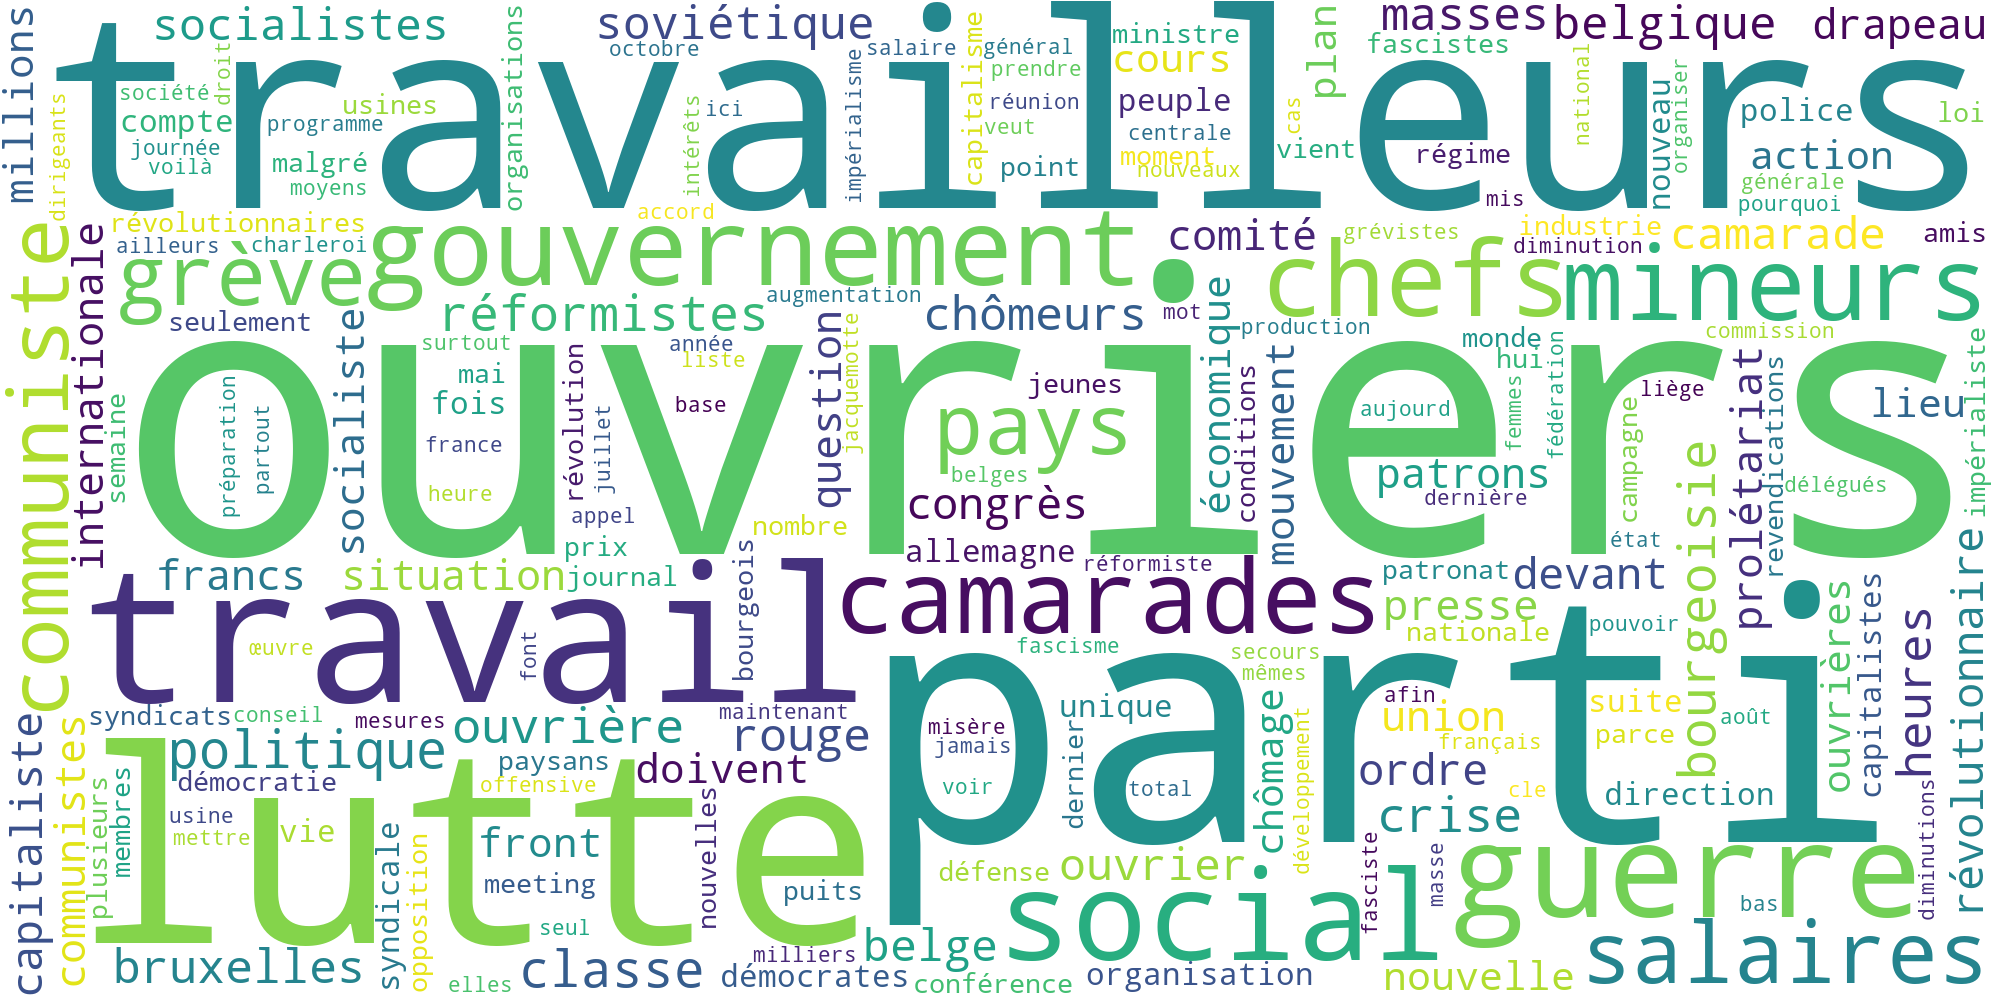

In [266]:
#Corpus1
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies1)
cloud.to_file(os.path.join(temp_path, f"DataRouge.png"))
Image(filename=os.path.join(temp_path, f"DataRouge.png"))

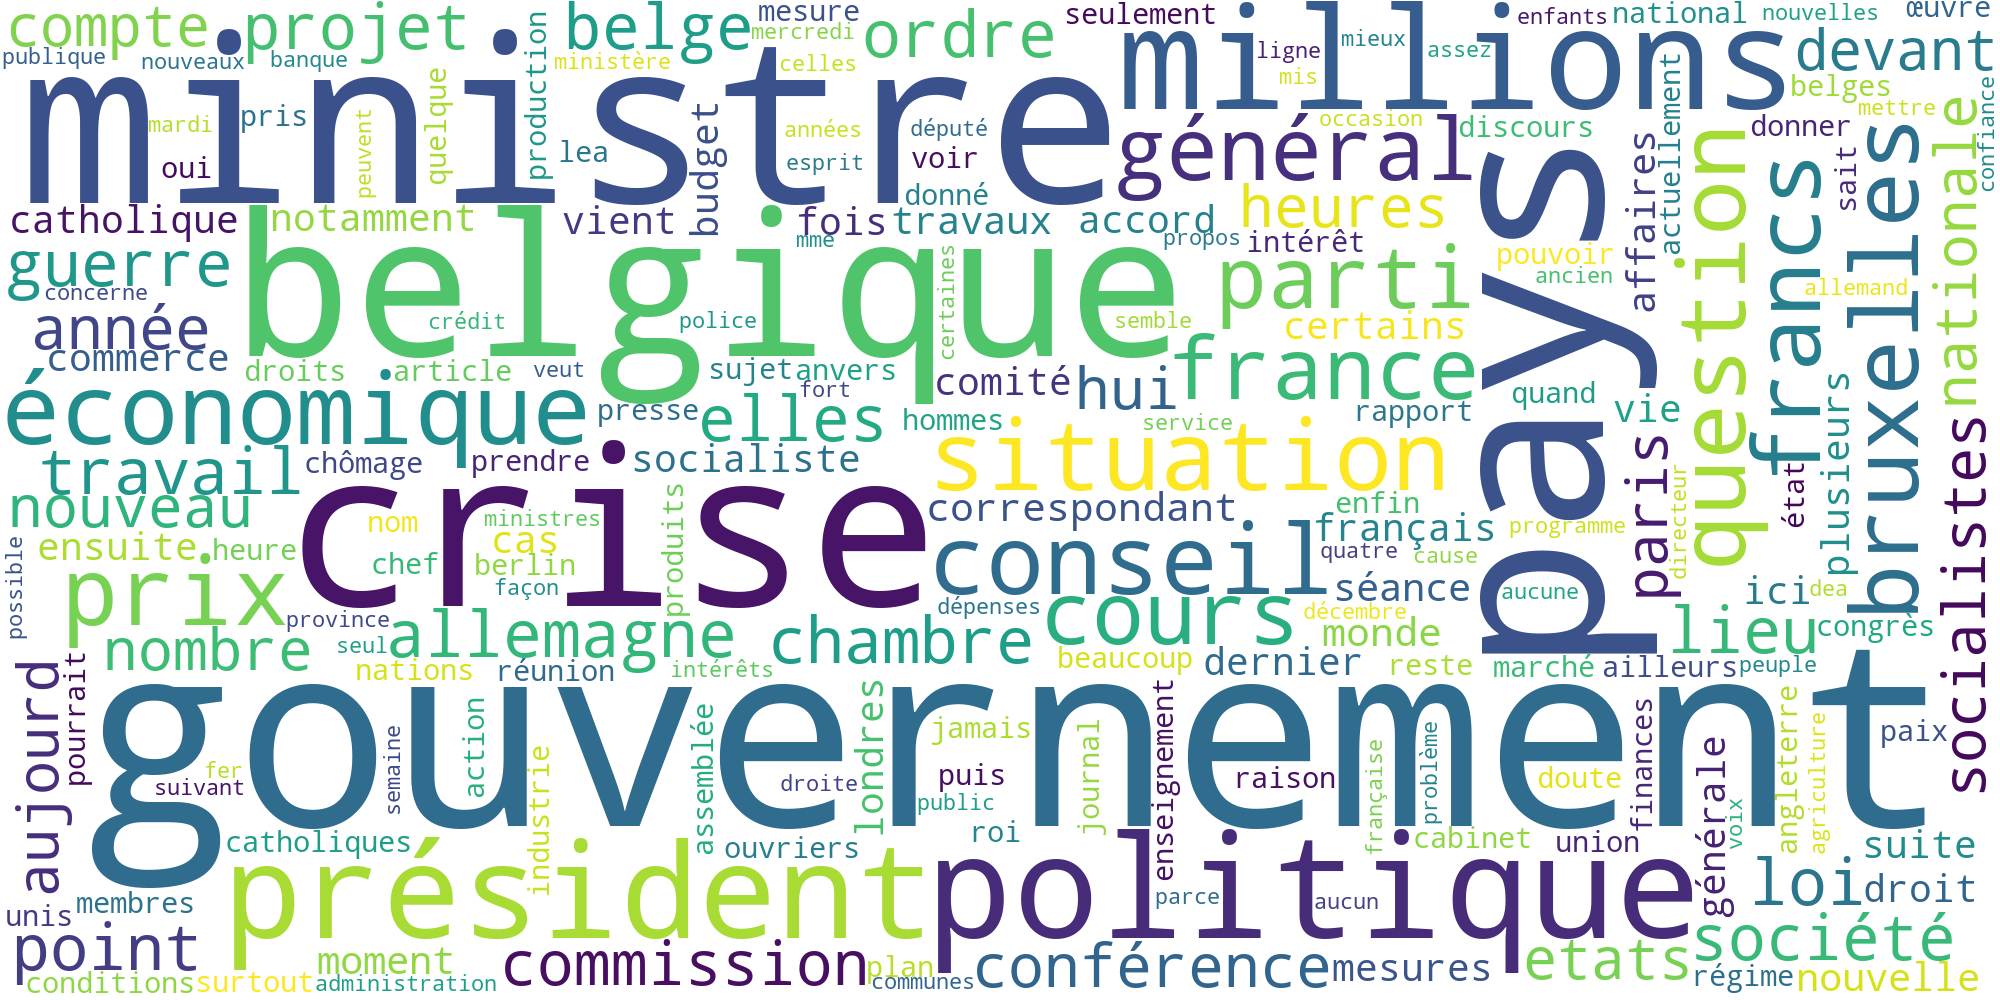

In [267]:
#Corpus2
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies2)
cloud.to_file(os.path.join(temp_path, f"DataLibre.png"))
Image(filename=os.path.join(temp_path, f"DataLibre.png"))

## V- Reconnaissances d'entités nommées